# 와인2

## 0.과제

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [3]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

from sklearn.ensemble import RandomForestClassifier

Mounted at /content/drive


In [4]:
train = pd.read_csv('/content/drive/MyDrive/와인/train.csv')
test = pd.read_csv('/content/drive/MyDrive/와인/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/와인/sample_submission.csv')

In [5]:
train

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,5492,5,7.7,0.150,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1,white
5493,5493,6,6.3,0.180,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,white
5494,5494,7,7.8,0.150,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,white
5495,5495,5,6.6,0.410,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5,white


### 1) 데이터 전처리

In [6]:
train['type'] = train['type'].map(lambda x : 0 if x == 'white' else 1)
train

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,0
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,1
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,0
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,0
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,5492,5,7.7,0.150,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1,0
5493,5493,6,6.3,0.180,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,0
5494,5494,7,7.8,0.150,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,0
5495,5495,5,6.6,0.410,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5,0


In [7]:
train = train.append(train[train['quality'].isin([4,7,8])])
train['quality'].value_counts().sort_index()

3      26
4     372
5    1788
6    2416
7    1848
8     304
9       5
Name: quality, dtype: int64

In [8]:
import numpy as np

def ACC(true, pred):
  score = np.mean(true==pred)
  return score

In [9]:
def make_plot():

  acc = ACC(y_valid, y_pred)

  validation = pd.DataFrame({'y_valid':y_valid, 'y_pred':y_pred})

  validation_count = pd.DataFrame(validation['y_valid'].value_counts().sort_index())
  validation_count.loc[validation['y_pred'].value_counts().sort_index().index, 'y_pred'] = validation['y_pred'].value_counts().sort_index()
  validation_count = validation_count.fillna(0)

  x = validation_count.index
  y_valid_count = validation_count['y_valid']
  y_pred_count = validation_count['y_pred']

  width = 0.35

  plt.figure(dpi=150)

  plt.title('ACC : ' + str(acc)[:6])
  plt.xlabel('quality')
  plt.ylabel('count')

  p1 = plt.bar([idx-width/2 for idx in x], y_valid_count, width, label='real')
  p2 = plt.bar([idx+width/2 for idx in x], y_pred_count,  width, label='pred')

  plt.legend()
  plt.show()

In [10]:
features = train.columns[2:]
features

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'type'],
      dtype='object')

In [11]:
X = train[features]
y = train['quality']

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


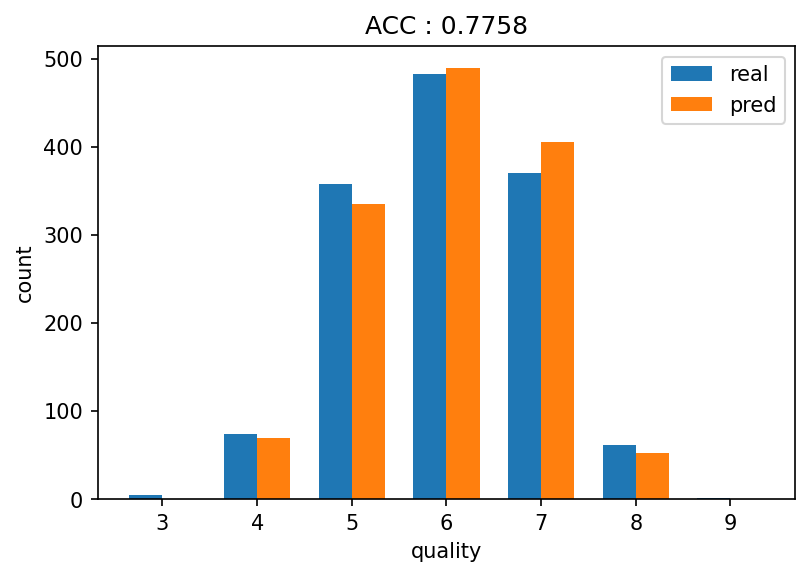

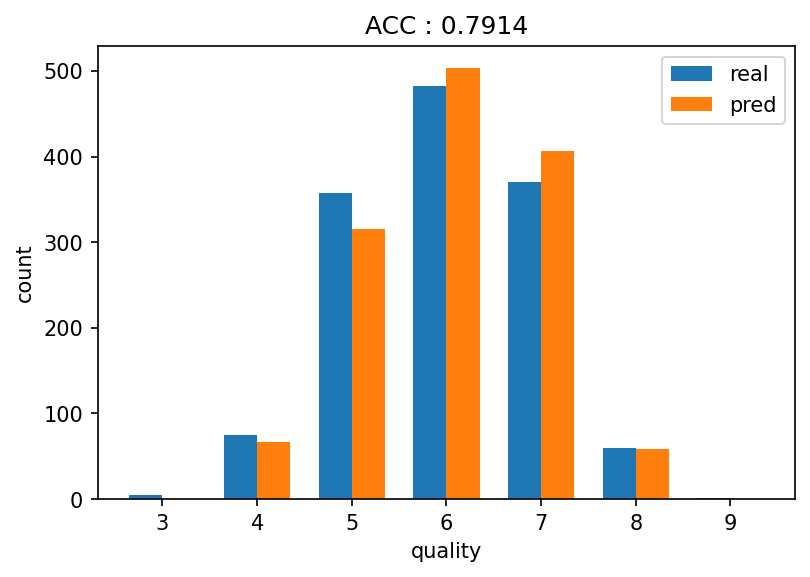

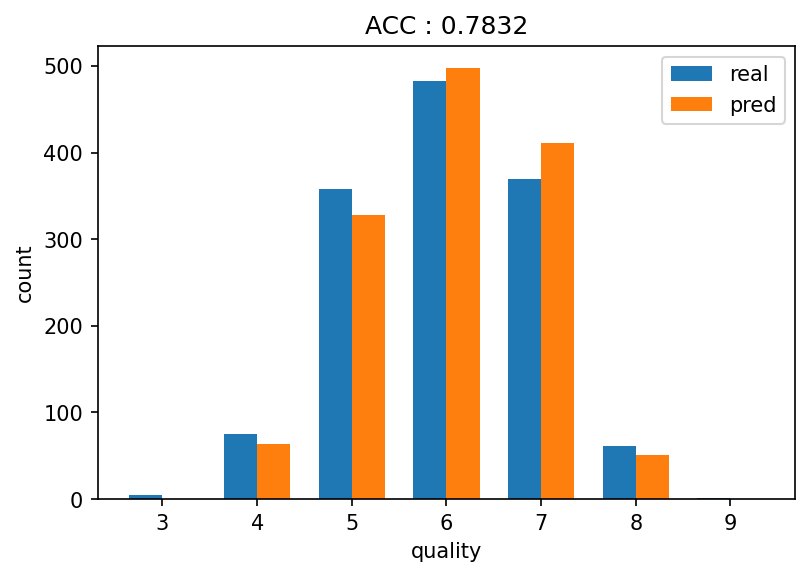

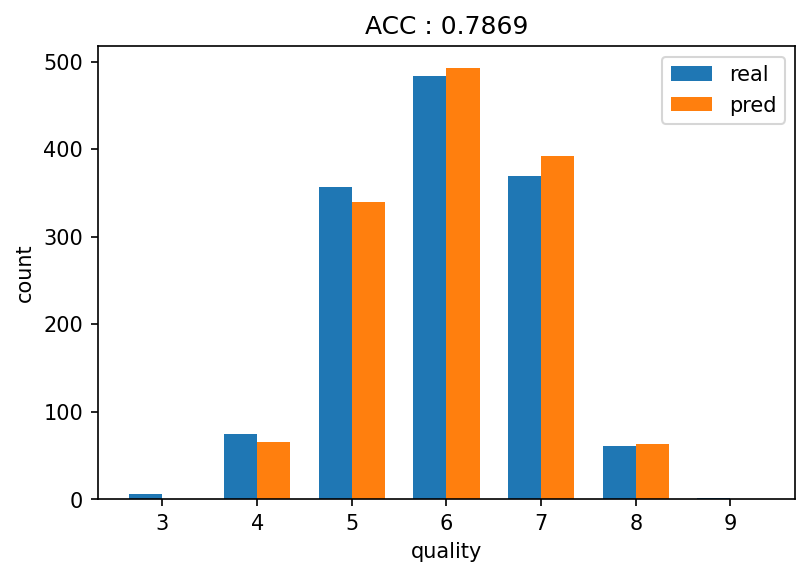

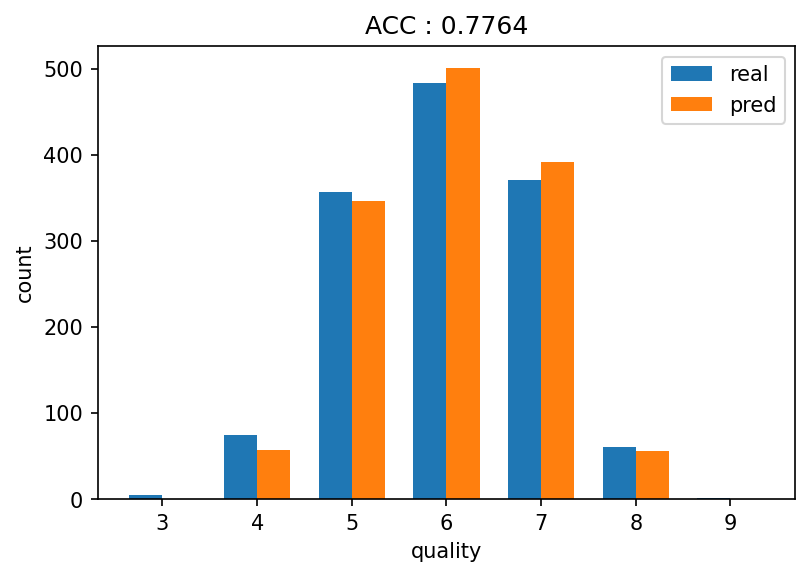

In [12]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=5, shuffle = True)

models = []
for train_idx, valid_idx in kfold.split(X,y):
  X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
  y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]

  model = RandomForestClassifier()

  model.fit(X_train, y_train)

  models.append(model)

  y_pred = model.predict(X_valid)

  make_plot()

In [13]:
test['type'] = test['type'].map(lambda x : 0 if x == 'white' else 1)

In [14]:
pred0 = models[0].predict(test[features])
pred1 = models[1].predict(test[features])
pred2 = models[2].predict(test[features])
pred3 = models[3].predict(test[features])
pred4 = models[4].predict(test[features])

### 2) 하드 보팅

In [15]:
pred = pd.DataFrame({'pred0':pred0, 'pred1':pred1, 'pred2':pred2, 'pred3':pred3, 'pred4':pred4})
pred

,pred0,pred1,pred2,pred3,pred4
0,5,6,6,6,5
1,6,5,6,6,6
2,6,6,6,6,6
3,5,5,5,6,5
4,6,6,6,6,6
...,...,...,...,...,...
995,6,6,6,6,5
996,6,6,6,6,6
997,5,5,6,5,5
998,6,6,6,6,6


In [16]:
pred['pred'] = pred.mode(axis=1)[0].astype(int)
submission['quality'] = pred['pred']
submission.to_csv('submission.csv', index=False)

### 3) 소프트 보팅

In [17]:
pred0 = models[0].predict_proba(test[features])
pred1 = models[1].predict_proba(test[features])
pred2 = models[2].predict_proba(test[features])
pred3 = models[3].predict_proba(test[features])
pred4 = models[4].predict_proba(test[features])

In [18]:
pred = pd.DataFrame((pred0+pred1+pred2+pred3+pred4)/5)
pred['quality'] = pd.DataFrame(np.argmax(np.array(pred), axis=1))
pred['quality'] = pred['quality'] + 3
pred

,0,1,2,3,4,5,6,quality
0,0.004,0.142,0.310,0.314,0.166,0.064,0.0,6
1,0.026,0.146,0.410,0.392,0.026,0.000,0.0,5
2,0.010,0.050,0.344,0.550,0.044,0.002,0.0,6
3,0.002,0.038,0.590,0.276,0.092,0.002,0.0,5
4,0.000,0.036,0.034,0.514,0.382,0.034,0.0,6
...,...,...,...,...,...,...,...,...
995,0.000,0.006,0.426,0.568,0.000,0.000,0.0,6
996,0.000,0.060,0.294,0.474,0.158,0.014,0.0,6
997,0.002,0.058,0.566,0.338,0.028,0.008,0.0,5
998,0.000,0.052,0.210,0.694,0.038,0.006,0.0,6


## 1.EDA-features

In [19]:
train

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,0
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,1
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,0
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,0
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5481,5481,7,5.4,0.835,0.08,1.2,0.046,13.0,93.0,0.99240,3.57,0.85,13.0,1
5482,5482,4,6.2,0.430,0.49,6.4,0.045,12.0,115.0,0.99630,3.27,0.57,9.0,0
5485,5485,4,6.3,0.280,0.22,9.5,0.040,30.0,111.0,0.99338,3.05,0.31,10.8,0
5491,5491,7,6.9,0.340,0.30,4.7,0.029,34.0,148.0,0.99165,3.36,0.49,12.3,0


In [20]:
def make_plots(text:str):
  plt.title(text + ' vs quality')

  x = train.groupby('quality').mean().reset_index()['quality']
  y = train.groupby('quality').mean().reset_index()[text]

  plt.bar(x,y)
  plt.show()

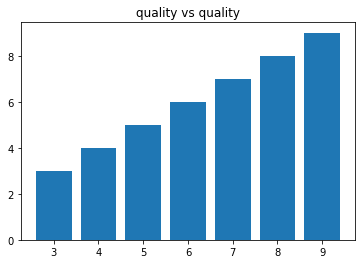

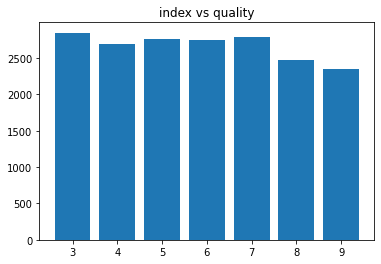

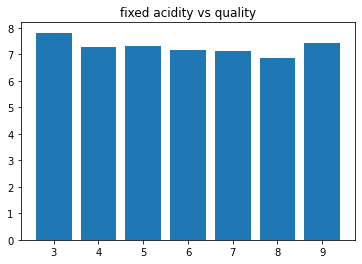

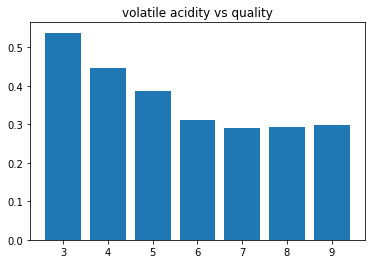

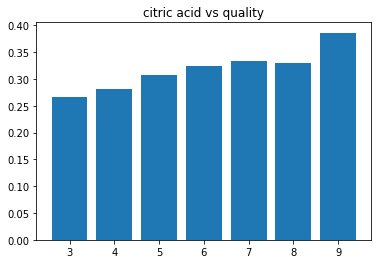

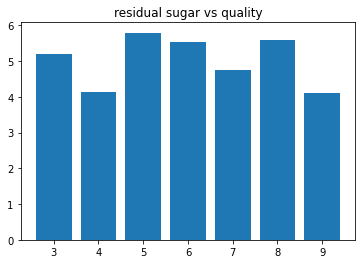

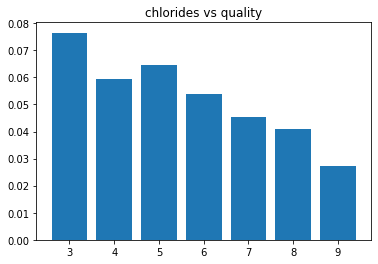

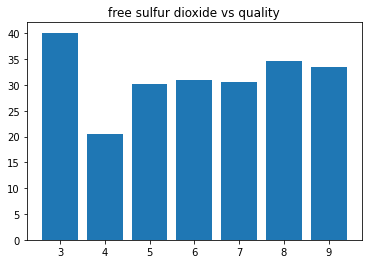

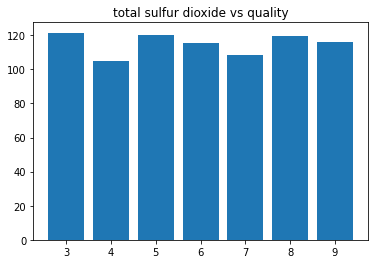

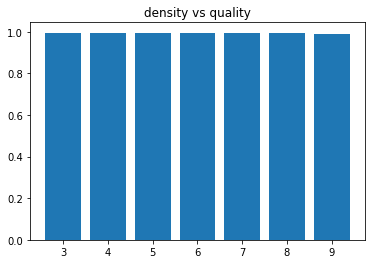

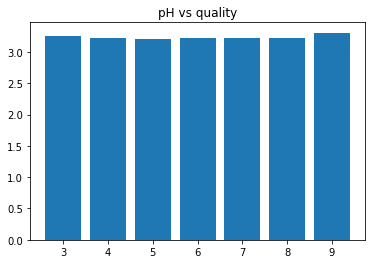

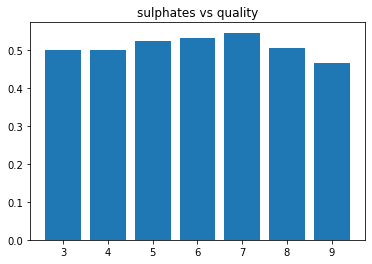

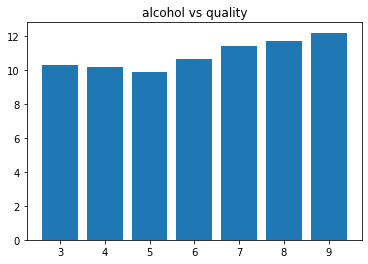

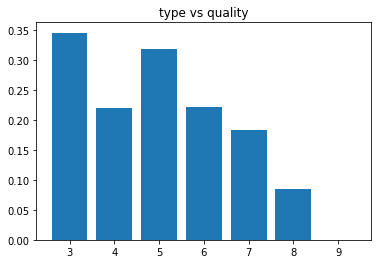

In [21]:
for col in train.groupby('quality').mean().reset_index()[2:]:
  make_plots(col)

## 2.데이터 전처리 기법

### 1) one-hot encoding

In [22]:
train

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,0
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,1
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,0
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,0
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5481,5481,7,5.4,0.835,0.08,1.2,0.046,13.0,93.0,0.99240,3.57,0.85,13.0,1
5482,5482,4,6.2,0.430,0.49,6.4,0.045,12.0,115.0,0.99630,3.27,0.57,9.0,0
5485,5485,4,6.3,0.280,0.22,9.5,0.040,30.0,111.0,0.99338,3.05,0.31,10.8,0
5491,5491,7,6.9,0.340,0.30,4.7,0.029,34.0,148.0,0.99165,3.36,0.49,12.3,0


In [23]:
train['type'] = train['type'].map(lambda x : 'white' if x == 0 else 'red')

In [24]:
train = pd.concat([train, pd.get_dummies(train['type'])], axis=1)
train

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,red,white
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white,0,1
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red,1,0
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white,0,1
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white,0,1
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5481,5481,7,5.4,0.835,0.08,1.2,0.046,13.0,93.0,0.99240,3.57,0.85,13.0,red,1,0
5482,5482,4,6.2,0.430,0.49,6.4,0.045,12.0,115.0,0.99630,3.27,0.57,9.0,white,0,1
5485,5485,4,6.3,0.280,0.22,9.5,0.040,30.0,111.0,0.99338,3.05,0.31,10.8,white,0,1
5491,5491,7,6.9,0.340,0.30,4.7,0.029,34.0,148.0,0.99165,3.36,0.49,12.3,white,0,1


### 2) 스케일링

In [25]:
train.columns[2:-3]

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train[train.columns[2:-3]] = scaler.fit_transform(train[train.columns[2:-3]])
train

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,red,white
0,0,5,0.148760,0.410000,0.036145,0.095092,0.054908,0.027778,0.179724,0.139001,0.551181,0.123596,0.318841,white,0,1
1,1,5,0.413223,0.353333,0.084337,0.027607,0.096506,0.031250,0.082949,0.188741,0.354331,0.207865,0.217391,red,1,0
2,2,5,0.338843,0.086667,0.234940,0.021472,0.079867,0.069444,0.304147,0.089647,0.244094,0.168539,0.420290,white,0,1
3,3,6,0.264463,0.086667,0.186747,0.082822,0.061564,0.097222,0.235023,0.130904,0.409449,0.157303,0.405797,white,0,1
4,4,6,0.330579,0.213333,0.156627,0.136503,0.083195,0.107639,0.396313,0.161751,0.236220,0.117978,0.420290,white,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5481,5481,7,0.132231,0.503333,0.048193,0.009202,0.061564,0.041667,0.200461,0.101986,0.653543,0.353933,0.724638,red,1,0
5482,5482,4,0.198347,0.233333,0.295181,0.088957,0.059900,0.038194,0.251152,0.177174,0.417323,0.196629,0.144928,white,0,1
5485,5485,4,0.206612,0.133333,0.132530,0.136503,0.051581,0.100694,0.241935,0.120879,0.244094,0.050562,0.405797,white,0,1
5491,5491,7,0.256198,0.173333,0.180723,0.062883,0.033278,0.114583,0.327189,0.087527,0.488189,0.151685,0.623188,white,0,1


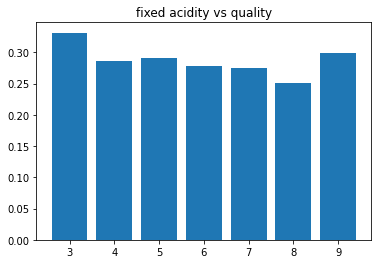

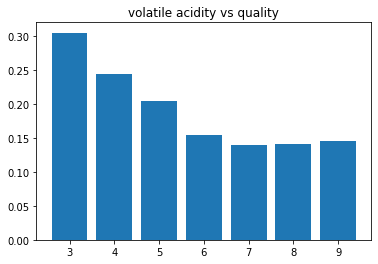

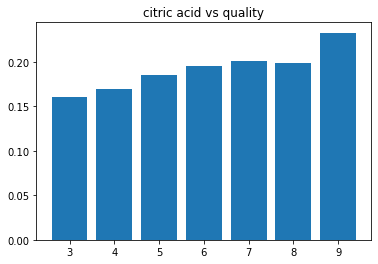

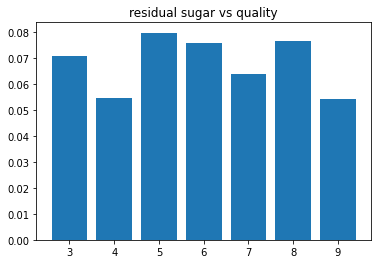

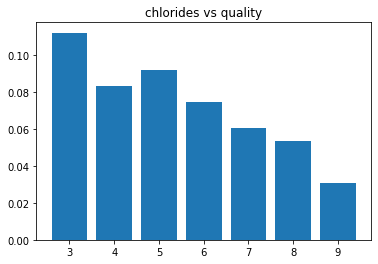

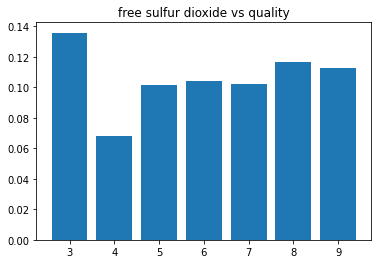

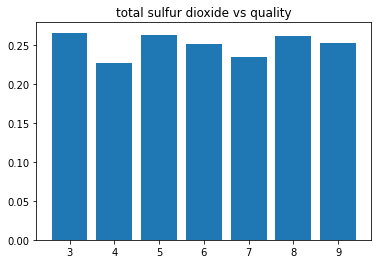

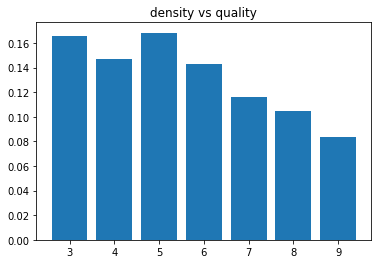

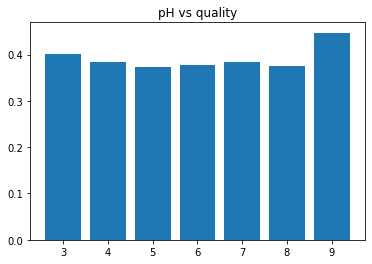

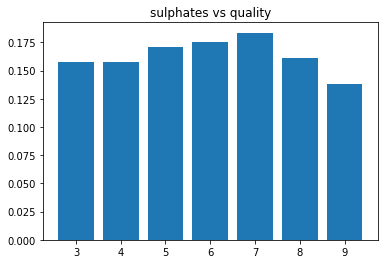

In [27]:
for col in train.groupby('quality').mean().reset_index().columns[2:-3]:
  make_plots(col)

### 3) 성능 검증

In [28]:
features = train.columns[2:].drop('type')
features

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'red', 'white'],
      dtype='object')

In [29]:
X = train[features]
y = train['quality']

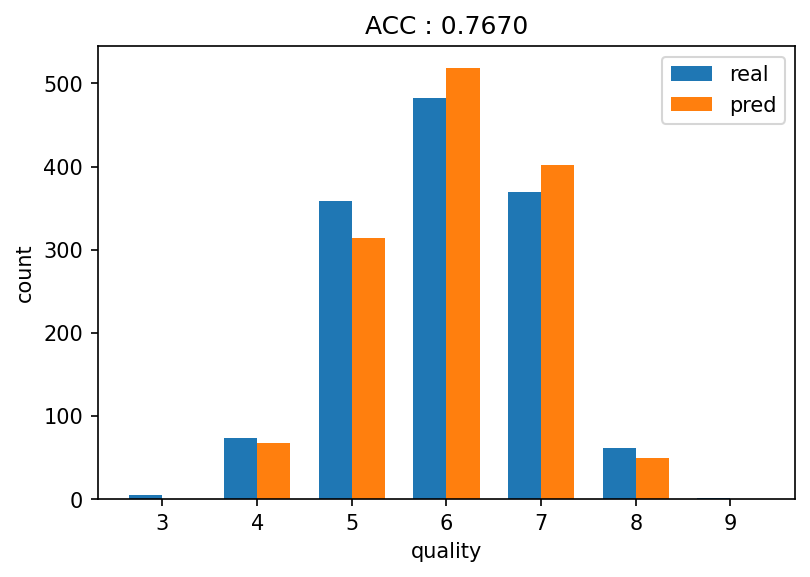

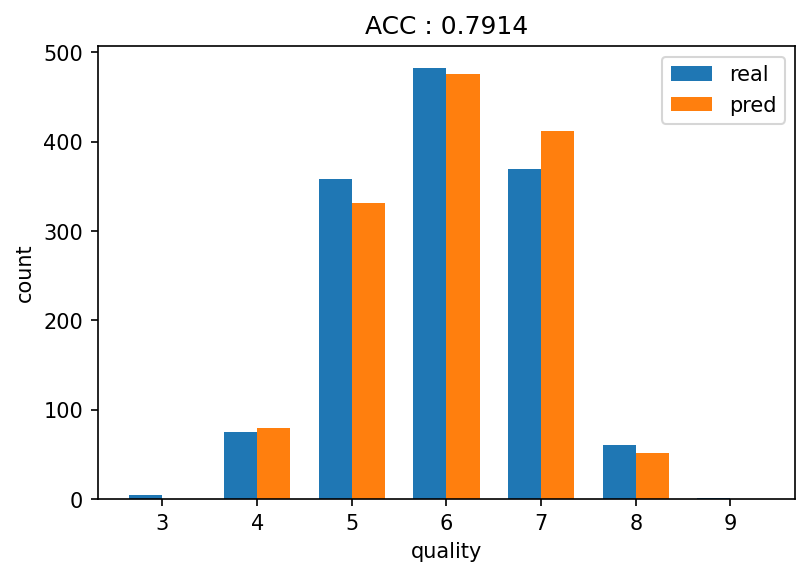

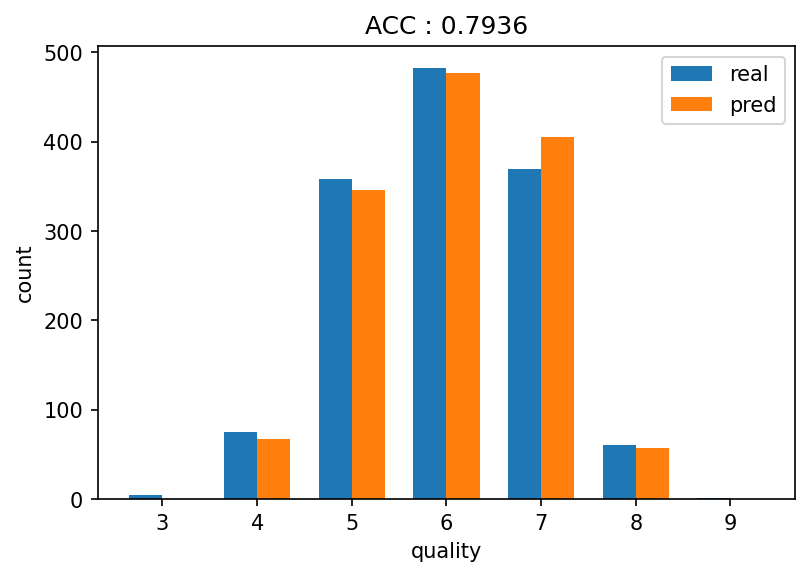

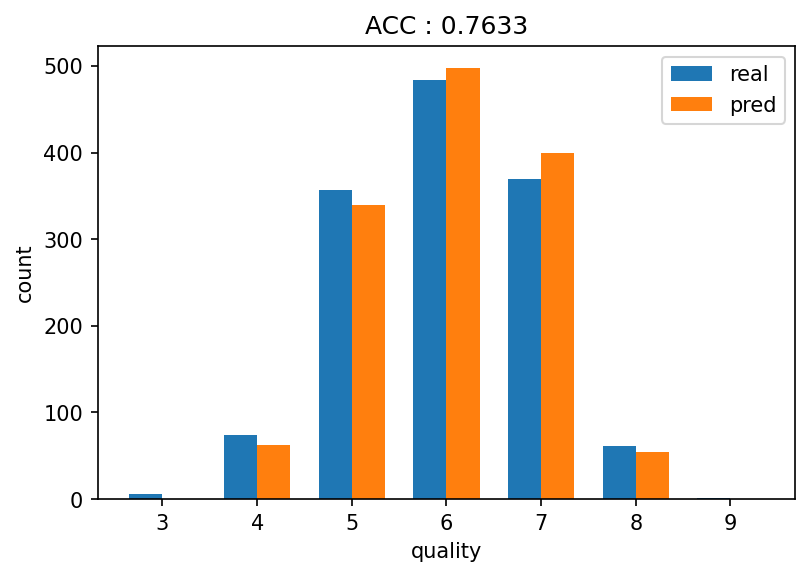

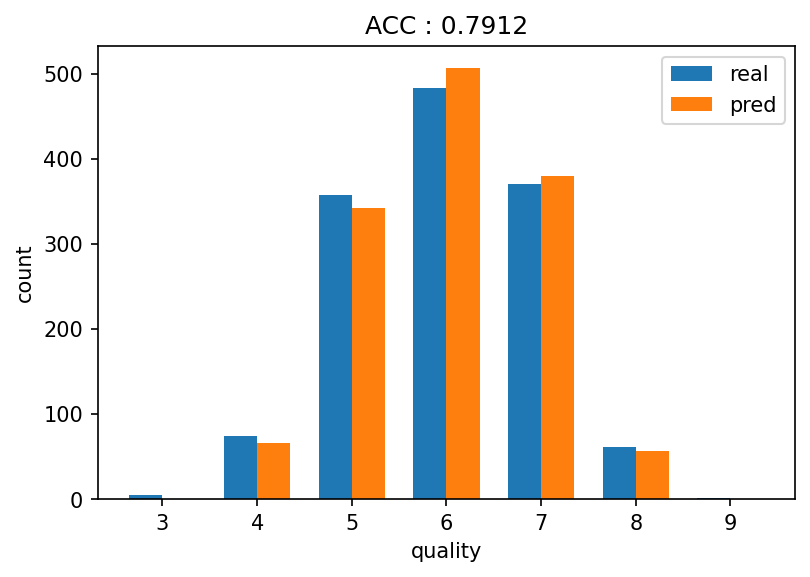

In [30]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=5, shuffle=True)

models = []
for train_idx, valid_idx in kfold.split(X,y):
  X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
  y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]

  model = RandomForestClassifier()

  model.fit(X_train, y_train)

  models.append(model)

  y_pred = model.predict(X_valid)

  make_plot()

## 3.GridSearchCV

### 1) GridSearchCV로 교차검증과 하이퍼파라미터 튜닝하기

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
params = {'n_estimators' : [100, 150, 200],
          'criterion' : ['gini', 'entropy']}

rf = GridSearchCV(RandomForestClassifier(), param_grid=params, cv=5, return_train_score=True, verbose=2)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_valid)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


[CV] END ...................criterion=gini, n_estimators=100; total time=   1.0s
[CV] END ...................criterion=gini, n_estimators=100; total time=   1.0s
[CV] END ...................criterion=gini, n_estimators=100; total time=   1.0s
[CV] END ...................criterion=gini, n_estimators=100; total time=   1.0s
[CV] END ...................criterion=gini, n_estimators=100; total time=   0.9s
[CV] END ...................criterion=gini, n_estimators=150; total time=   1.4s
[CV] END ...................criterion=gini, n_estimators=150; total time=   1.4s
[CV] END ...................criterion=gini, n_estimators=150; total time=   1.4s
[CV] END ...................criterion=gini, n_estimators=150; total time=   1.4s
[CV] END ...................criterion=gini, n_estimators=150; total time=   1.4s
[CV] END ...................criterion=gini, n_estimators=200; total time=   1.9s
[CV] END ...................criterion=gini, n_estimators=200; total time=   1.9s
[CV] END ...................

### 2) validation 셋으로 검증하기

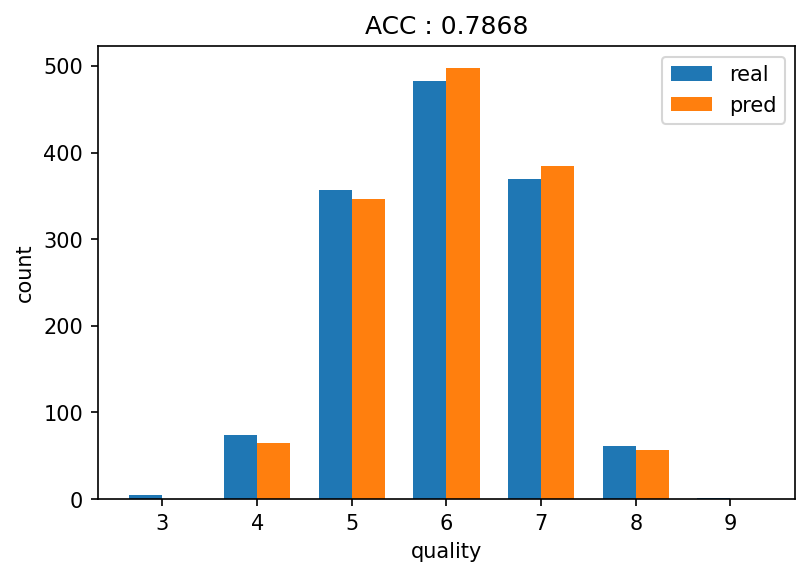

In [33]:
make_plot()

In [34]:
rf.best_score_

0.7757007699791901

In [35]:
rf.best_params_

{'criterion': 'entropy', 'n_estimators': 150}

### 3) validation 셋 구축 X

In [36]:
params = {'n_estimators': [100,150,200],
          'criterion' : ['gini', 'entropy']}

rf = GridSearchCV(RandomForestClassifier(), param_grid=params, cv=5, return_train_score=True, verbose=2)

rf.fit(X,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ...................criterion=gini, n_estimators=100; total time=   1.2s
[CV] END ...................criterion=gini, n_estimators=100; total time=   2.4s
[CV] END ...................criterion=gini, n_estimators=100; total time=   1.2s
[CV] END ...................criterion=gini, n_estimators=100; total time=   1.1s
[CV] END ...................criterion=gini, n_estimators=100; total time=   1.1s
[CV] END ...................criterion=gini, n_estimators=150; total time=   1.7s
[CV] END ...................criterion=gini, n_estimators=150; total time=   1.7s
[CV] END ...................criterion=gini, n_estimators=150; total time=   1.7s
[CV] END ...................criterion=gini, n_estimators=150; total time=   1.7s
[CV] END ...................criterion=gini, n_estimators=150; total time=   1.7s
[CV] END ...................criterion=gini, n_estimators=200; total time=   2.3s
[CV] END ...................criterion=gini, n_est

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [100, 150, 200]},
             return_train_score=True, verbose=2)

In [37]:
rf.best_score_

0.8246755635755237

In [38]:
rf.best_params_

{'criterion': 'gini', 'n_estimators': 150}

In [39]:
test['type'] = test['type'].map(lambda x : 'white' if x == 0 else 'red')
test = pd.concat([test, pd.get_dummies(test['type'])], axis=1)
test

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,red,white
0,0,9.0,0.31,0.48,6.60,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white,0,1
1,1,13.3,0.43,0.58,1.90,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red,1,0
2,2,6.5,0.28,0.27,5.20,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white,0,1
3,3,7.2,0.15,0.39,1.80,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white,0,1
4,4,6.8,0.26,0.26,2.00,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,7.1,0.59,0.02,2.30,0.082,24.0,94.0,0.99744,3.55,0.53,9.7,red,1,0
996,996,8.7,0.15,0.30,1.60,0.046,29.0,130.0,0.99420,3.22,0.38,9.8,white,0,1
997,997,8.8,0.66,0.26,1.70,0.074,4.0,23.0,0.99710,3.15,0.74,9.2,red,1,0
998,998,7.0,0.42,0.19,2.30,0.071,18.0,36.0,0.99476,3.39,0.56,10.9,red,1,0


In [40]:
pd.DataFrame(rf.predict(test[features]))

,0
0,6
1,6
2,6
3,6
4,6
...,...
995,6
996,6
997,6
998,6


## 4.모델 앙상블

### 1) GridSearchCV로 모델 학습

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [42]:
models = []

rfc = RandomForestClassifier()

models.append(rfc)

gbc = GradientBoostingClassifier()

models.append(gbc)

etc = ExtraTreesClassifier()

models.append(etc)

In [43]:
best_models = {}
params = [{}, {}, {}]

for i, model in enumerate(models):
  model = GridSearchCV(model, param_grid=params[i], cv=5, return_train_score=True, verbose=2)

  model.fit(X,y)

  best_models[i] = model.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .................................................... total time=   1.2s
[CV] END .................................................... total time=   1.2s
[CV] END .................................................... total time=   1.1s
[CV] END .................................................... total time=   1.1s
[CV] END .................................................... total time=   1.2s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .................................................... total time=   8.9s
[CV] END .................................................... total time=   8.9s
[CV] END .................................................... total time=   8.9s
[CV] END .................................................... total time=   8.9s
[CV] END .................................................... total time=   8.9s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ....

In [44]:
best_models

{0: RandomForestClassifier(),
 1: GradientBoostingClassifier(),
 2: ExtraTreesClassifier()}

# 중요 : test셋 스케일링

test셋을 스케일링 할때는 fit_transform이 아니라 transform 사용!

In [45]:
test[test.columns[1:-3]] = scaler.transform(test[test.columns[1:-3]])
test

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,red,white
0,0,0.429752,0.153333,0.289157,0.092025,0.056572,0.034722,0.154378,0.128976,0.125984,0.089888,0.521739,white,0,1
1,1,0.785124,0.233333,0.349398,0.019939,0.101498,0.048611,0.078341,0.256217,0.251969,0.151685,0.144928,red,1,0
2,2,0.223140,0.133333,0.162651,0.070552,0.051581,0.149306,0.398618,0.148255,0.354331,0.264045,0.202899,white,0,1
3,3,0.280992,0.046667,0.234940,0.018405,0.056572,0.069444,0.352535,0.148255,0.614173,0.140449,0.289855,white,0,1
4,4,0.247934,0.120000,0.156627,0.021472,0.016639,0.078125,0.152074,0.063621,0.330709,0.140449,0.550725,white,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,0.272727,0.340000,0.012048,0.026074,0.121464,0.079861,0.202765,0.199152,0.637795,0.174157,0.246377,red,1,0
996,996,0.404959,0.046667,0.180723,0.015337,0.061564,0.097222,0.285714,0.136688,0.377953,0.089888,0.260870,white,0,1
997,997,0.413223,0.386667,0.156627,0.016871,0.108153,0.010417,0.039171,0.192597,0.322835,0.292135,0.173913,red,1,0
998,998,0.264463,0.226667,0.114458,0.026074,0.103161,0.059028,0.069124,0.147484,0.511811,0.191011,0.420290,red,1,0


In [46]:
best_models

{0: RandomForestClassifier(),
 1: GradientBoostingClassifier(),
 2: ExtraTreesClassifier()}

## 하드보팅과 소프트보팅 구현해서 제출해보기!

In [47]:
pred0 = best_models[0].predict(test[features])
pred1 = best_models[1].predict(test[features])
pred2 = best_models[2].predict(test[features])
pred = pd.DataFrame({'pred0':pred0, 'pred1':pred1, 'pred2':pred2})
pred.head()

,pred0,pred1,pred2
0,5,6,5
1,6,5,6
2,6,5,6
3,5,6,5
4,6,7,6


In [48]:
pred['pred'] = pred.mode(axis=1)[0].astype(int)
pred

,pred0,pred1,pred2,pred
0,5,6,5,5
1,6,5,6,6
2,6,5,6,6
3,5,6,5,5
4,6,7,6,6
...,...,...,...,...
995,6,5,6,6
996,6,6,6,6
997,5,5,5,5
998,6,6,6,6


In [49]:
pred0 = best_models[0].predict_proba(test[features])
pred1 = best_models[1].predict_proba(test[features])
pred2 = best_models[2].predict_proba(test[features])
pred = pd.DataFrame((pred0+pred1+pred2)/3)
pred.head()

,0,1,2,3,4,5,6
0,0.003464,0.174113,0.298419,0.313574,0.157947,0.052472,1.072243e-05
1,0.031016,0.111124,0.360958,0.462428,0.033358,0.001114,2.017900e-06
2,0.003379,0.023006,0.366415,0.555609,0.048167,0.003424,4.815355e-07
3,0.000099,0.010963,0.680885,0.209175,0.091758,0.007118,3.017095e-06
4,0.000081,0.032362,0.062660,0.504382,0.370929,0.029583,2.081653e-06


In [50]:
pd.DataFrame(np.argmax(np.array(pred), axis=1))+3

,0
0,6
1,6
2,6
3,5
4,6
...,...
995,6
996,6
997,5
998,6


### 3) VotingClassifier를 이용한 스태킹 앙상블

In [51]:
estimators = [
    ('rfc', best_models[0]),
    ('gbc', best_models[1]),
    ('etc', best_models[2])
]

In [52]:
from sklearn.ensemble import VotingClassifier

model = VotingClassifier(estimators = estimators, voting='soft')
model.fit(X,y)

VotingClassifier(estimators=[('rfc', RandomForestClassifier()),
                             ('gbc', GradientBoostingClassifier()),
                             ('etc', ExtraTreesClassifier())],
                 voting='soft')

In [53]:
model.score(X,y)

1.0

In [54]:
model.predict(test[features])

array([5, 6, 6, 5, 6, 6, 6, 6, 6, 7, 6, 6, 7, 6, 6, 5, 6, 6, 6, 5, 6, 6,
       5, 7, 6, 5, 5, 5, 5, 5, 7, 6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 5, 6, 6,
       6, 7, 5, 6, 4, 6, 5, 5, 6, 4, 5, 6, 6, 5, 5, 6, 5, 6, 6, 4, 6, 6,
       5, 5, 6, 5, 5, 5, 5, 6, 6, 5, 6, 6, 6, 7, 6, 6, 5, 4, 6, 6, 5, 5,
       6, 7, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 5, 6, 6, 5, 6, 6, 6, 6, 7, 5,
       6, 6, 6, 5, 5, 6, 6, 7, 7, 5, 6, 5, 6, 7, 5, 5, 6, 6, 6, 7, 5, 5,
       4, 5, 5, 6, 6, 7, 5, 5, 5, 6, 5, 5, 5, 5, 7, 6, 8, 6, 5, 8, 6, 5,
       6, 5, 5, 6, 6, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5, 6, 5, 5, 6, 5, 6, 5,
       6, 5, 6, 5, 6, 6, 7, 4, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 7, 5,
       5, 5, 6, 5, 6, 6, 5, 5, 6, 6, 6, 6, 7, 5, 5, 5, 6, 6, 6, 6, 6, 7,
       6, 6, 6, 6, 7, 6, 6, 5, 6, 5, 6, 7, 7, 6, 6, 6, 6, 6, 6, 7, 6, 6,
       6, 6, 7, 6, 6, 6, 6, 7, 5, 6, 7, 7, 6, 6, 6, 7, 7, 6, 7, 5, 5, 7,
       5, 5, 6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 7, 7, 5, 6, 6, 6, 6, 6, 7, 7,
       6, 6, 6, 6, 5, 5, 5, 6, 5, 7, 8, 5, 5, 7, 7,